In [26]:
import numpy as np
import pandas as pd
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
import seaborn as sns

### Protein Analysis

In [18]:
swissprot = pd.read_csv('../processed_data/protein2EC.csv')
swissprot

,Entry,Entry Name,Sequence,EC number,Length
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.-,269
1,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269
2,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248
3,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471
4,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333
...,...,...,...,...,...
208979,P36352,POLR_PHMV,VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...,2.7.7.48,178
208980,P39262,VG56_BPT4,MAHFNECAHLIEGVDKAQNEYWDILGDEKDPLQVMLDMQRFLQIRL...,3.6.1.12,171
208981,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240
208982,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172


In [21]:
swissprot['Sequence'].nunique()

162000

In [24]:
swissprot['EC number'].nunique()

4653

### Reaction Analysis

In [2]:
enzymemap = pd.read_csv('/disk1/jyang4/repos/CARE/processed_data/reaction2EC.csv')
enzymemap

,Reaction,EC number,Reaction Text
0,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r}
1,CCO.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r}
2,CC(=O)C=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)...,1.1.1.1,methylglyoxal + NADH + H+ = acetol + NAD+ {r}
3,CC(=O)CO.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)...,1.1.1.1,methylglyoxal + NADH + H+ = acetol + NAD+ {r}
4,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,1.1.1.1,2-dehydro-3-deoxy-D-gluconate + NADH + H+ = 4-...
...,...,...,...
62891,CC(C)=CCOP(=O)(O)OP(=O)(O)O.Nc1ncnc2c1ncn2[C@@...,6.5.1.3,ATP + dimethylallyl diphosphate = dimethylally...
62892,CC(C)=CCC/C(C)=C/COP(=O)(O)OP(=O)(O)O.Nc1ncnc2...,6.5.1.3,ATP + geranyl diphosphate = geranyl-triphospho...
62893,CC(C)=CCC/C(C)=C/COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,6.5.1.3,ATP + geranyl triphosphate = geranyl-tetraphos...
62894,C=C(C)CCOP(=O)(O)OP(=O)(O)O.Nc1ncnc2c1ncn2[C@@...,6.5.1.3,ATP + isopentenyl diphosphate = adenosine 5'-i...


In [20]:
enzymemap[enzymemap['EC number'].str.contains('-')]

,Reaction,EC number,Reaction Text


In [15]:
enzymemap['Reaction'].nunique()

47640

In [23]:
enzymemap['EC number'].nunique()

4552

Text(0.5, 0, 'Number of reactions')

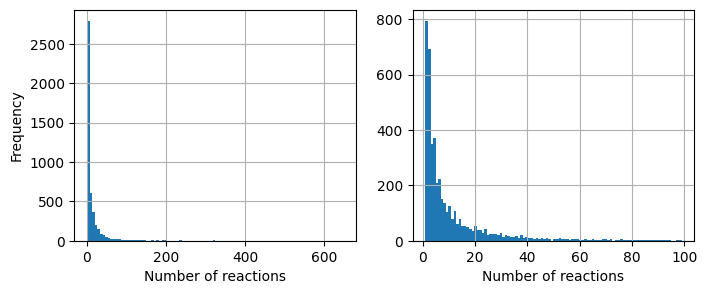

In [6]:
plt.figure(figsize=(8, 3))
plt.subplot(1,2, 1)
enzymemap['EC number'].value_counts().hist(bins = 100)
plt.xlabel('Number of reactions')
plt.ylabel('Frequency')
#plt.legend(['ECreact', 'EnzymeMap'])

plt.subplot(1,2, 2)
subset = enzymemap[enzymemap['EC number'].map(enzymemap['EC number'].value_counts()) < 100]
subset['EC number'].value_counts().hist(bins = 100)
plt.xlabel('Number of reactions')
#plt.legend(['ECreact', 'EnzymeMap'])

### Visualize a few reactions for tryptophane synthase

In [9]:
TrpB = enzymemap[enzymemap['EC number'] == '4.2.1.20']
TrpB.head()

,Reaction,EC number,Reaction Text
57636,N[C@@H](CO)C(=O)O.O=P(O)(O)OCC(O)COc1c[nH]c2cc...,4.2.1.20,1-(indol-3-yl)glycerol 3-phosphate + L-serine ...
57637,O=P(O)(O)OC[C@H](O)[C@H](O)c1c[nH]c2ccccc12>>O...,4.2.1.20,1-(indol-3-yl)glycerol 3-phosphate = D-glycera...
57638,O=C[C@@H](O)COP(=O)(O)O.c1ccc2[nH]ccc2c1>>O=P(...,4.2.1.20,1-(indol-3-yl)glycerol 3-phosphate = D-glycera...
57639,N[C@@H](CO)C(=O)O.c1ccc2[nH]ccc2c1>>N[C@@H](Cc...,4.2.1.20,L-serine + indole = tryptophan + H2O
57640,N[C@@H](CO)C(=O)O.O=P(O)(O)OC[C@@H](O)[C@@H](O...,4.2.1.20,"(1S,2R)-1-C-(indol-3-yl)glycerol 3-phosphate +..."


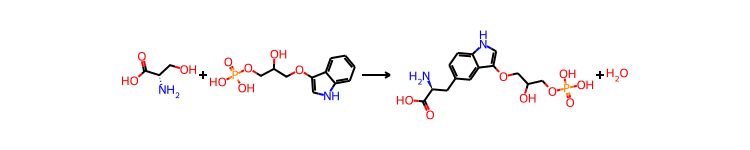

In [11]:
AllChem.ReactionFromSmarts(TrpB['Reaction'].values[0], useSmiles=True)

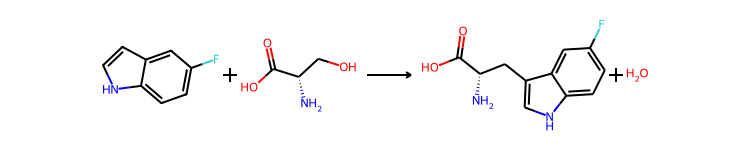

In [14]:
AllChem.ReactionFromSmarts(TrpB['Reaction'].values[52], useSmiles=True)

In [49]:
enzymemap['mapped'].nunique()

47974

### Look at distribution of EC numbers, comparison

In [30]:
#find the overlap in ECs between swissprot and enzymemap
overlap_ECs = list(set(enzymemap['EC number']).intersection(set(swissprot['EC number'])))
len(overlap_ECs)

3077

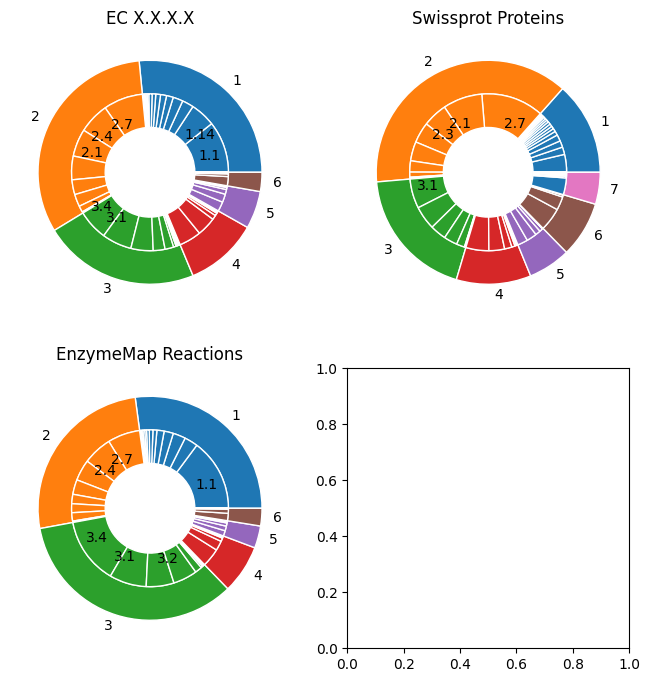

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for index, title in enumerate(['EC X.X.X.X', 'Swissprot Proteins', 'EnzymeMap Reactions']):

    df = pd.DataFrame()
    
    if index == 0:
        df['EC'] = overlap_ECs
    elif index == 1:
        df['EC'] = swissprot['EC number']
    elif index == 2:
        df['EC'] = enzymemap['EC number']

    
    df['EC1'] = df['EC'].str.split('.').str[0]
    df['EC2'] = df['EC'].str.split('.').str[:2].str.join('.')

    distribution = [list(df[df['EC1'] == ec]['EC2'].value_counts().values) for ec in np.sort(df['EC1'].unique())]
    level2_labels = [list(df[df['EC1'] == ec]['EC2'].value_counts().keys()) for ec in np.sort(df['EC1'].unique())]

    #concatenate zeros so that each list is the same length
    max_len = max([len(l) for l in distribution])
    for i, l in enumerate(distribution):
        distribution[i] = l + [0] * (max_len - len(l))
        level2_labels[i] = level2_labels[i] + [''] * (max_len - len(level2_labels[i]))
    #distribution

    sum = np.sum(np.sum(distribution))
    #replace level2 labels with an empty string if the corresponding entry in distribution is too small
    for i, l in enumerate(distribution):
        for j, count in enumerate(l):
            if count/sum < 0.05:
                level2_labels[i][j] = ''


    size = 0.3
    #vals = np.array([[1000., 32.], [37., 40.], [29., 10.]])
    vals = np.array(distribution)
    i = index // 2
    j = index % 2

    cmap = plt.colormaps["tab10"]
    #outer_colors = cmap(np.arange(vals.shape[0])*3.7)
    #inner_colors = cmap(np.arange(vals.shape[0]*vals.shape[1]))

    mylabels = np.arange(1, vals.shape[0]+1)

    outer_colors = sns.color_palette("tab10", vals.shape[0])
    axs[i, j].pie(vals.sum(axis=1), radius=1, colors=outer_colors,
        wedgeprops=dict(width=size, edgecolor='w'), labels=mylabels)
    #repeat the outer colors as the inner colors
    inner_colors = []
    for k in range(6):
        inner_colors = inner_colors + [outer_colors[k]] * vals.shape[1]


    axs[i, j].pie(vals.flatten(), radius=1-size, colors=inner_colors,
        wedgeprops=dict(width=size, edgecolor='w'), labels=np.array(level2_labels).flatten(), labeldistance=0.65, )

    axs[i, j].set(aspect="equal", title=title)
plt.show()